In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

base_dir = '/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small'
#base_dir = '/your_path/cats_and_dogs_small/'

train_cats_dir = os.path.join(base_dir, 'train', 'cats')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

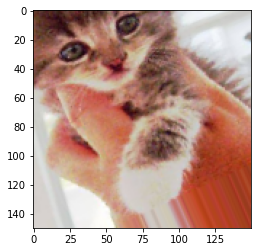

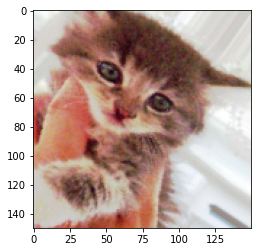

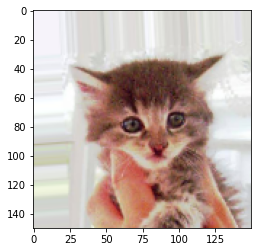

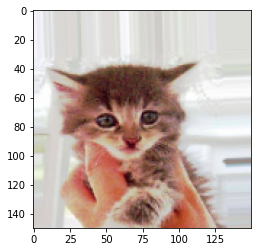

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
img_path = fnames[3]

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야 함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
from tensorflow.keras import layers, models

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증/테스트 데이터는 증식되어서는 안됨
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리 지정
        train_dir,
        # 모든 이미지를 150 × 150 크기로 변경
        target_size=(150, 150),
        batch_size=20,
        # 손실함수 binary_crossentropy를 사용하기 때문에 이진 레이블 필요
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 1822s 18s/step - loss: 0.7057 - accuracy: 0.5029 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6911 - accuracy: 0.5256 - val_loss: 0.6775 - val_accuracy: 0.5880
Epoch 3/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6869 - accuracy: 0.5470 - val_loss: 0.6613 - val_accuracy: 0.6050
Epoch 4/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6676 - accuracy: 0.5862 - val_loss: 0.6453 - val_accuracy: 0.6310
Epoch 5/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6512 - accuracy: 0.6316 - val_loss: 0.6372 - val_accuracy: 0.6220
Epoch 6/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6530 - accuracy: 0.6151 - val_loss: 0.6204 - val_accuracy: 0.6610
Epoch 7/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6310 - accuracy: 0.6455 - val_loss: 0.6071 -

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

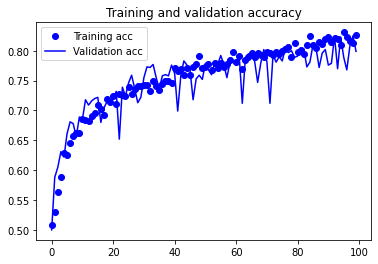

In [13]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

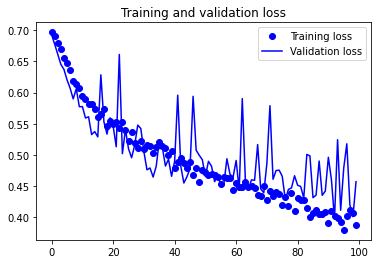

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [16]:
print(test_loss)
print(test_accuracy)

0.4830799996852875
0.7929999828338623


In [16]:
from tensorflow.keras.models import load_model

model =load_model('/content/drive/MyDrive/cats_and_dogs_small_argmentation.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/train/cats/cat.743.jpg'
img = image.load_img(img_path, target_size=(150, 150))

In [20]:
import numpy as np

img_tensor =image.img_to_array(img)
img_tensor =np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


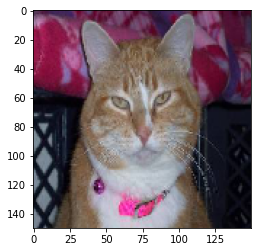

In [21]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [22]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
activations = activation_model.predict(img_tensor)

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


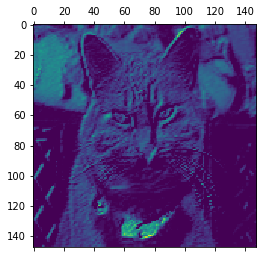

In [25]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

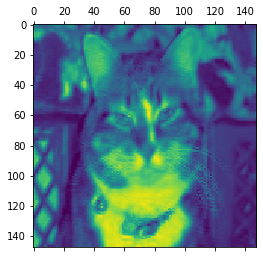

In [26]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

In [27]:
drawFeatureMap(activations)

NameError: ignored